In [2]:
# ייבוא ספריות חובה
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# הגדרת סגנון גרפיקה
sns.set_style('whitegrid')

# הגדרת נתיב הקובץ
# הנתיב מותאם לפי מבנה התיקיות שהעלית
file_path = 'DataSet MALICIOS URLs/DataSet MALICIOS URLs/CSV WITH MAL URLS/phishing_url.csv'

# טעינת הנתונים
try:
    df = pd.read_csv(file_path)
    print(f"הנתונים נטענו בהצלחה! מספר שורות: {df.shape[0]}, מספר עמודות: {df.shape[1]}")
except FileNotFoundError:
    print(f"שגיאה: הקובץ לא נמצא בנתיב: {file_path}. אנא ודא את הנתיב הנכון.")
except Exception as e:
    print(f"אירעה שגיאה בטעינת הקובץ: {e}")

הנתונים נטענו בהצלחה! מספר שורות: 19300, מספר עמודות: 18


In [3]:
# הצגת 5 השורות הראשונות
print("--- 5 השורות הראשונות של ה-DataFrame ---")
df.head()

--- 5 השורות הראשונות של ה-DataFrame ---


,Domain,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix/Suffix,DNS_Record,Web_Traffic,Domain_Age,Domain_End,iFrame,Mouse_Over,Right_Click,Web_Forwards,Label
0,graphicriver.net,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0
1,ecnavi.jp,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0
2,hubpages.com,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0
3,extratorrent.cc,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0
4,icicibank.com,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0


In [4]:
# בדיקת מידע כללי (סוגי נתונים וערכים לא חסרים)
print("\n--- מידע כללי על ה-DataFrame (df.info()) ---")
df.info()


--- מידע כללי על ה-DataFrame (df.info()) ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19300 entries, 0 to 19299
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Domain         19300 non-null  object 
 1   Have_IP        10000 non-null  float64
 2   Have_At        10000 non-null  float64
 3   URL_Length     10000 non-null  float64
 4   URL_Depth      10000 non-null  float64
 5   Redirection    10000 non-null  float64
 6   https_Domain   10000 non-null  float64
 7   TinyURL        10000 non-null  float64
 8   Prefix/Suffix  10000 non-null  float64
 9   DNS_Record     10000 non-null  float64
 10  Web_Traffic    10000 non-null  float64
 11  Domain_Age     10000 non-null  float64
 12  Domain_End     10000 non-null  float64
 13  iFrame         10000 non-null  float64
 14  Mouse_Over     10000 non-null  float64
 15  Right_Click    10000 non-null  float64
 16  Web_Forwards   10000 non-null  float64
 17  Labe

In [5]:
# בדיקת ערכים חסרים
print("\n--- ספירת ערכים חסרים (NaN/None) לפי עמודה ---")
missing_values = df.isnull().sum()
# סינון והצגת עמודות עם ערכים חסרים בלבד
missing_values[missing_values > 0].sort_values(ascending=False)


--- ספירת ערכים חסרים (NaN/None) לפי עמודה ---


Have_IP          9300
Have_At          9300
URL_Length       9300
URL_Depth        9300
Redirection      9300
https_Domain     9300
TinyURL          9300
Prefix/Suffix    9300
DNS_Record       9300
Web_Traffic      9300
Domain_Age       9300
Domain_End       9300
iFrame           9300
Mouse_Over       9300
Right_Click      9300
Web_Forwards     9300
dtype: int64

--- התפלגות משתנה היעד ('Label') ---

ספירת דוגמאות:
Label
0    14300
1     5000
Name: count, dtype: int64

אחוזים:
Label
0    74.09
1    25.91
Name: proportion, dtype: float64


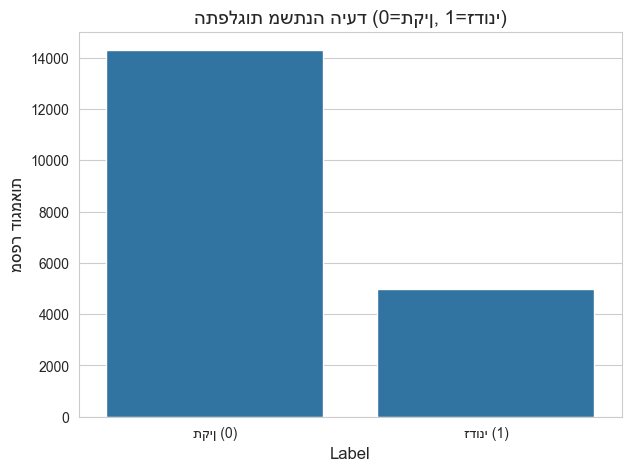

In [9]:
# ניתוח איזון משתנה היעד (Label)
print("--- התפלגות משתנה היעד ('Label') ---")
label_counts = df['Label'].value_counts()
label_percentages = df['Label'].value_counts(normalize=True) * 100

print(f"\nספירת דוגמאות:\n{label_counts}")
print(f"\nאחוזים:\n{label_percentages.round(2)}")

# ויזואליזציה של משתנה היעד
plt.figure(figsize=(7, 5))
sns.barplot(x=label_counts.index, y=label_counts.values)
plt.title("התפלגות משתנה היעד (0=תקין, 1=זדוני)", fontsize=14)
plt.xlabel('Label', fontsize=12)
plt.ylabel('מספר דוגמאות', fontsize=12)
plt.xticks([0, 1], ['תקין (0)', 'זדוני (1)'])
plt.show()
# מסקנה: ודא שה-Dataset מאוזן מספיק. אם לא, תצטרך לטפל בחוסר איזון בשלב מאוחר יותר.

In [7]:
# הצגת סטטיסטיקה תיאורית עבור מאפיינים מספריים
print("--- סטטיסטיקה תיאורית (df.describe()) ---")
df.describe()

--- סטטיסטיקה תיאורית (df.describe()) ---


,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix/Suffix,DNS_Record,Web_Traffic,Domain_Age,Domain_End,iFrame,Mouse_Over,Right_Click,Web_Forwards,Label
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0000,10000.000000,10000.00000,10000.00000,10000.000000,19300.000000
mean,0.005500,0.022600,0.773400,3.072000,0.013500,0.000200,0.090300,0.093200,0.100800,0.845700,0.413700,0.8099,0.090900,0.06660,0.99930,0.105300,0.259067
std,0.073961,0.148632,0.418653,2.128631,0.115408,0.014141,0.286625,0.290727,0.301079,0.361254,0.492521,0.3924,0.287481,0.24934,0.02645,0.306955,0.438134
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.00000,0.00000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.0000,0.000000,0.00000,1.00000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.0000,0.000000,0.00000,1.00000,0.000000,0.000000
75%,0.000000,0.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.0000,0.000000,0.00000,1.00000,0.000000,1.000000
max,1.000000,1.000000,1.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0000,1.000000,1.00000,1.00000,1.000000,1.000000


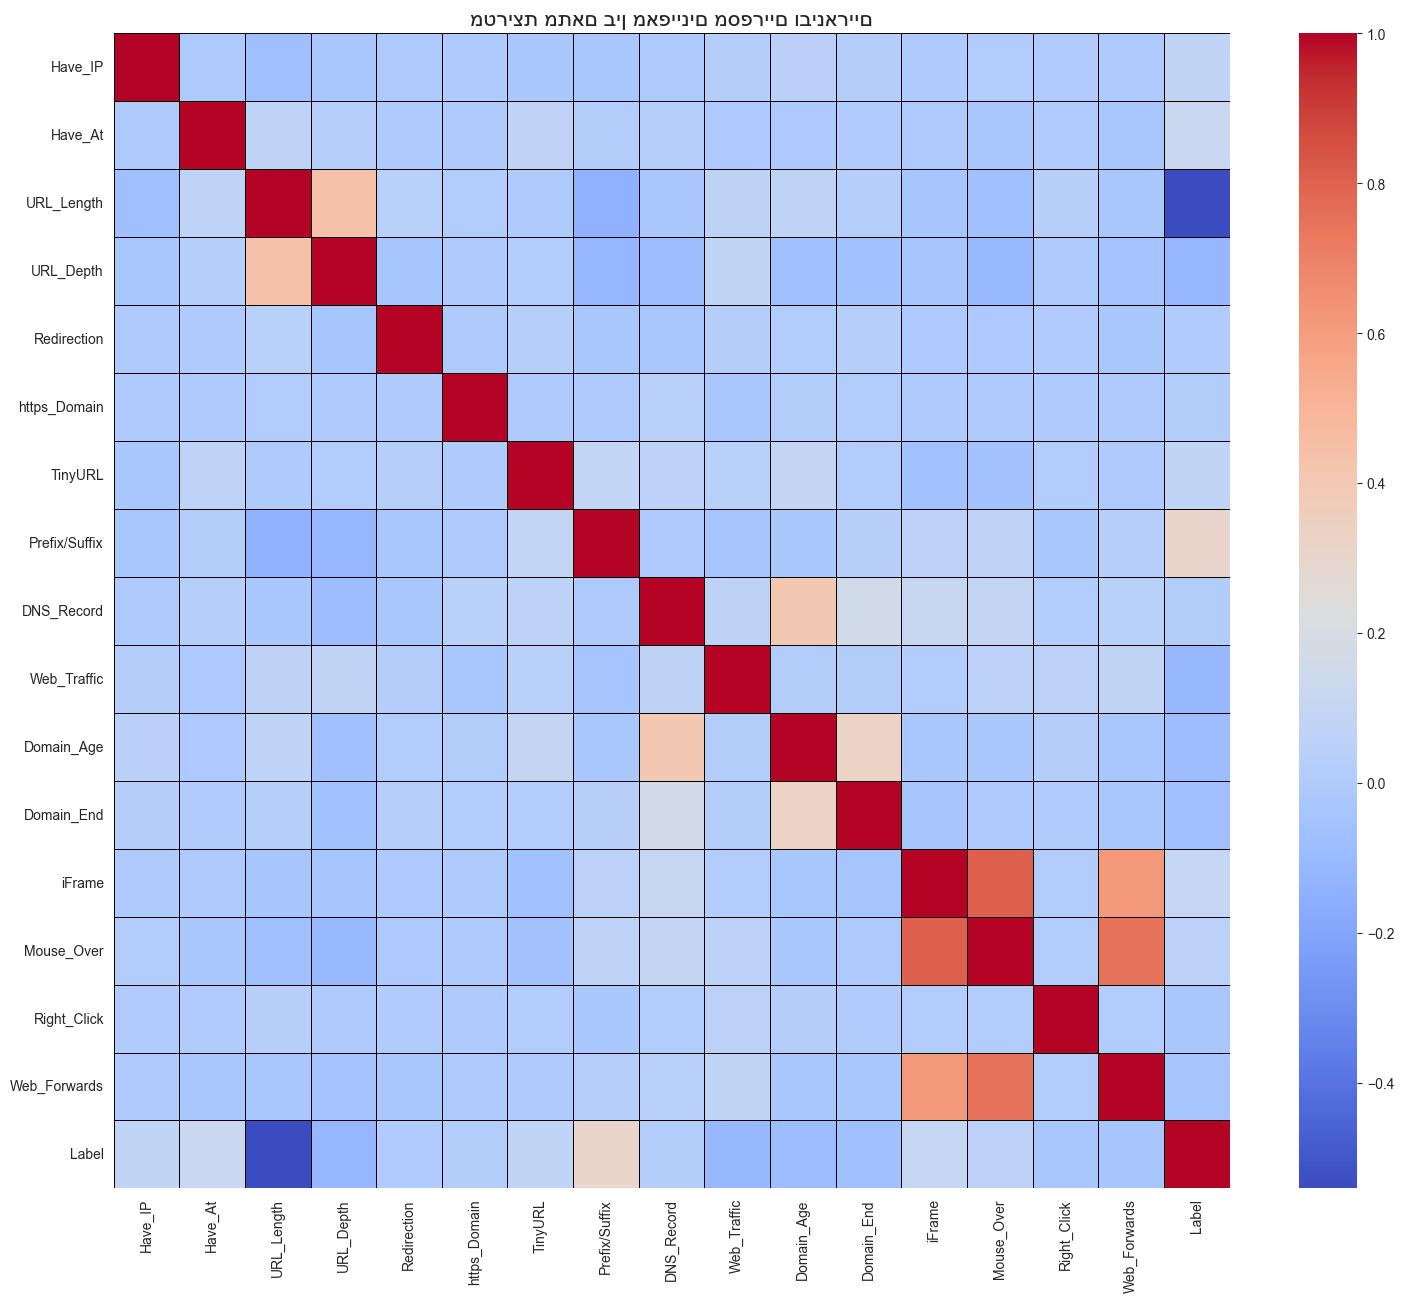


--- מתאם עם משתנה היעד (Label) ---
Label            1.000000
Prefix/Suffix    0.302705
Have_At          0.118419
iFrame           0.098446
Have_IP          0.074367
TinyURL          0.072921
Mouse_Over       0.051338
DNS_Record       0.015943
https_Domain     0.014144
Redirection      0.002600
Right_Click     -0.026467
Name: Label, dtype: float64


In [15]:
df_numeric = df.select_dtypes(include=['number'])
plt.figure(figsize=(18, 15))
correlation_matrix = df_numeric.corr() # הפתרון: שימוש ב-select_dtypes
# או:
# correlation_matrix = df.corr(numeric_only=True)

# 4. הצגת המתאם
sns.heatmap(
    correlation_matrix, 
    annot=False, 
    cmap='coolwarm', 
    fmt=".2f",
    linewidths=.5,
    linecolor='black'
)
plt.title('מטריצת מתאם בין מאפיינים מספריים ובינאריים', fontsize=16)
plt.show()

# 5. הצגת המתאם עם משתנה היעד 'Label'
print("\n--- מתאם עם משתנה היעד (Label) ---")
label_corr = correlation_matrix['Label'].sort_values(ascending=False)
print(label_corr.head(11))

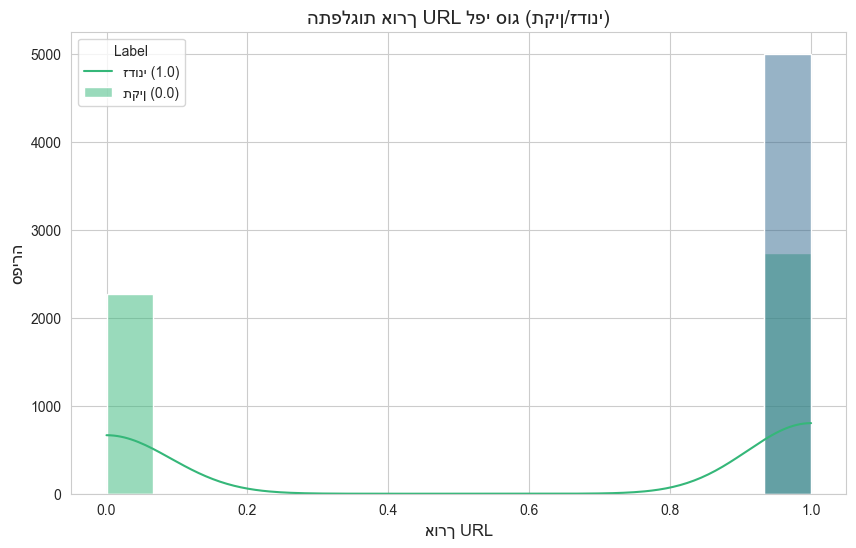


--- סטטיסטיקה של 'URL_Length' לפי סוג URL ---


,count,mean,std,min,25%,50%,75%,max
Label,,,,,,,,
0,5000.0,1.0000,0.000000,1.0,1.0,1.0,1.0,1.0
1,5000.0,0.5468,0.497855,0.0,0.0,1.0,1.0,1.0


In [12]:
# ניתוח השוואתי של 'URL_Length' לפי 'Label'
plt.figure(figsize=(10, 6))
sns.histplot(df, x='URL_Length', hue='Label', kde=True, palette='viridis')
plt.title('התפלגות אורך URL לפי סוג (תקין/זדוני)', fontsize=14)
plt.xlabel('אורך URL', fontsize=12)
plt.ylabel('ספירה', fontsize=12)
plt.legend(title='Label', labels=['זדוני (1.0)', 'תקין (0.0)'])
plt.show()

print("\n--- סטטיסטיקה של 'URL_Length' לפי סוג URL ---")
df.groupby('Label')['URL_Length'].describe()

# המסקנה תהיה: האם אורך ה-URL הממוצע שונה משמעותית בין שתי הקבוצות?

C:\Users\danie\AppData\Local\Temp\ipykernel_36232\1005802155.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
C:\Users\danie\AppData\Local\Temp\ipykernel_36232\1005802155.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


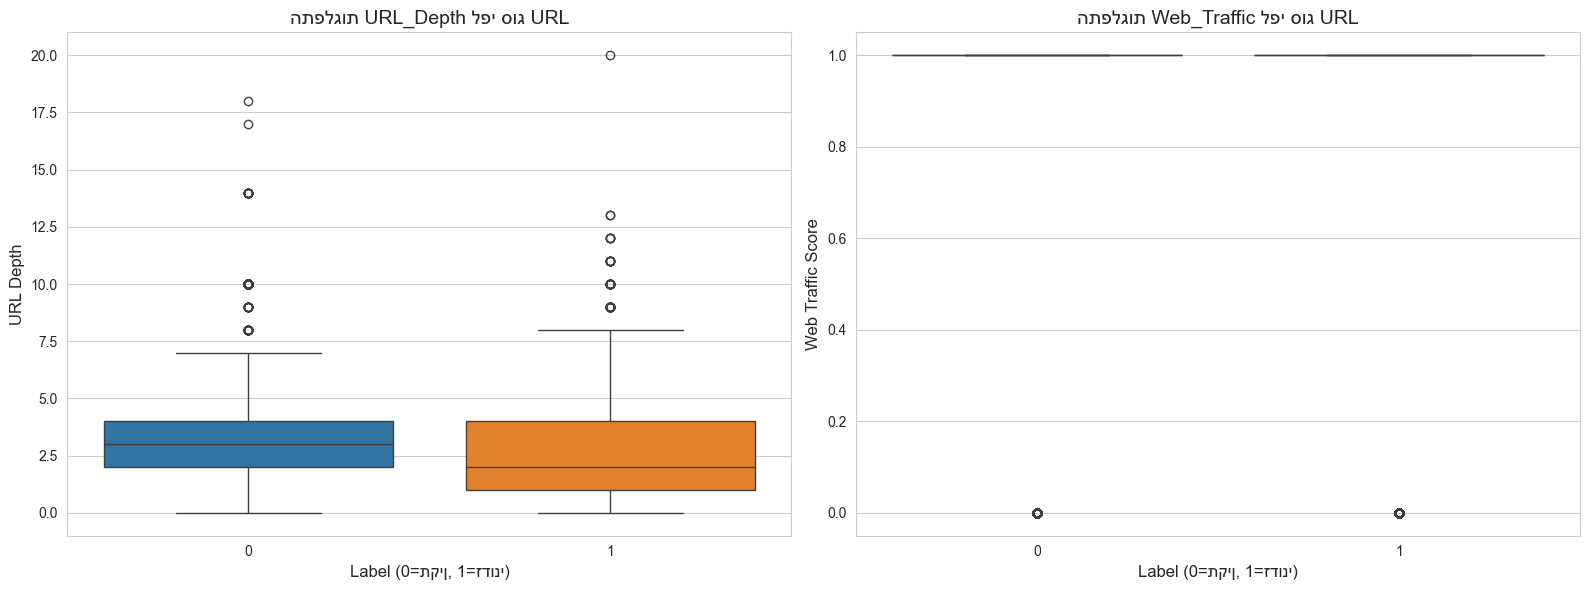

In [16]:
# נניח שה-DataFrame שלך הוא df ושהבעיה עם עמודת ה-Domain טופלה
# אם העמודה Domain עדיין ב-DF, הקוד יעבוד אם df.select_dtypes(include=['number']) שימש קודם לכן.

import matplotlib.pyplot as plt
import seaborn as sns

# הגדרת הגרפים
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
sns.set_style('whitegrid')

# --- גרף 1: URL_Depth ---
sns.boxplot(
    x='Label', 
    y='URL_Depth', 
    data=df, 
    palette=['#1f77b4', '#ff7f0e'], # כחול ותפוז
    ax=axes[0]
)
axes[0].set_title('התפלגות URL_Depth לפי סוג URL', fontsize=14)
axes[0].set_xlabel('Label (0=תקין, 1=זדוני)', fontsize=12)
axes[0].set_ylabel('URL Depth', fontsize=12)
axes[0].set_xticks([0, 1])

# --- גרף 2: Web_Traffic ---
sns.boxplot(
    x='Label', 
    y='Web_Traffic', 
    data=df, 
    palette=['#1f77b4', '#ff7f0e'],
    ax=axes[1]
)
axes[1].set_title('התפלגות Web_Traffic לפי סוג URL', fontsize=14)
axes[1].set_xlabel('Label (0=תקין, 1=זדוני)', fontsize=12)
axes[1].set_ylabel('Web Traffic Score', fontsize=12)
axes[1].set_xticks([0, 1])

plt.tight_layout()
plt.show()

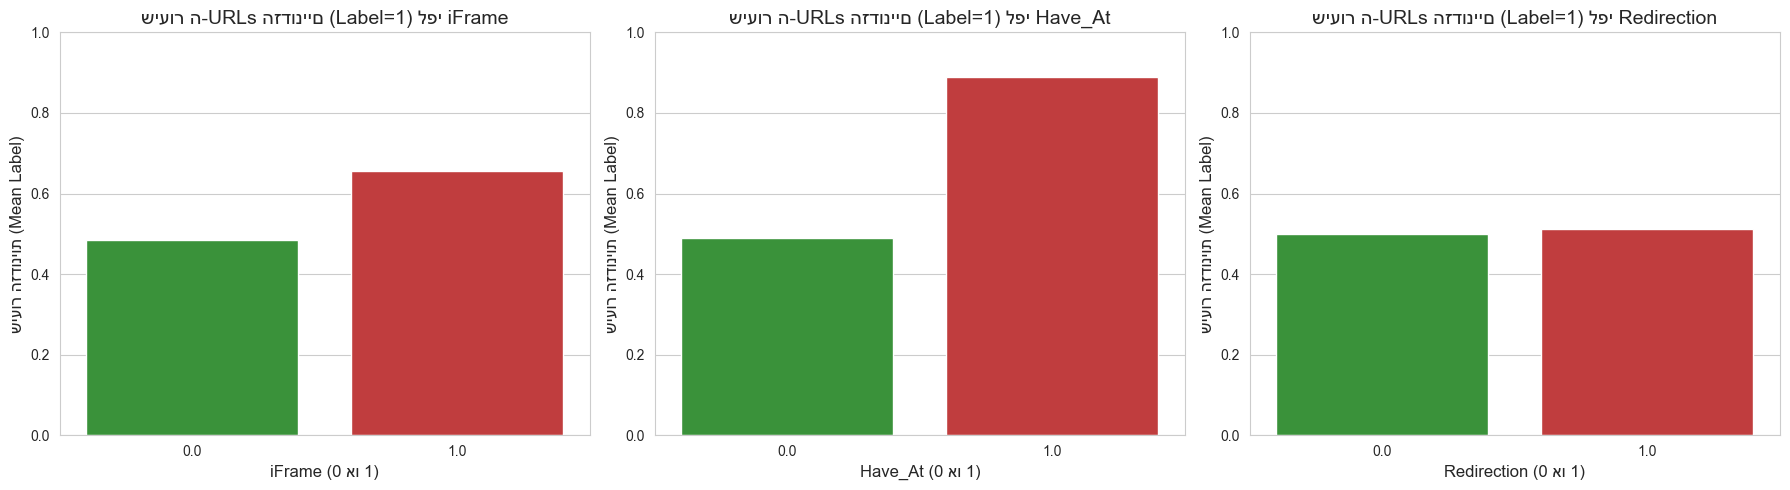

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# רשימת המאפיינים הבינאריים החזקים
binary_features = ['iFrame', 'Have_At', 'Redirection'] 

# נניח שה-DataFrame שלך הוא df (כפי שעבד בהצלחה)

# יצירת גרפים עבור שלושת המאפיינים
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
sns.set_style('whitegrid')

# צבעים
color_palette = ['#2ca02c', '#d62728'] # ירוק (0) ואדום (1)

for i, feature in enumerate(binary_features):
    # חישוב הממוצע של 'Label' עבור כל ערך של המאפיין
    feature_impact = df.groupby(feature)['Label'].mean().reset_index()
    
    # ------------------ השינוי הוא כאן ------------------
    # משתמשים במשתנה ה-X גם כ-Hue כדי להתאים לצבעים
    sns.barplot(
        data=feature_impact,
        x=feature, 
        y='Label', 
        hue=feature,              # <--- הוספת משתנה ה-hue
        palette=color_palette, 
        legend=False,             # <--- הסרת מקרא מיותר
        ax=axes[i]
    )
    # ----------------------------------------------------
    
    axes[i].set_title(f'שיעור ה-URLs הזדוניים (Label=1) לפי {feature}', fontsize=14)
    axes[i].set_xlabel(f'{feature} (0 או 1)', fontsize=12)
    axes[i].set_ylabel('שיעור הזדוניות (Mean Label)', fontsize=12)
    axes[i].set_ylim(0, 1.0)
    axes[i].set_xticks([0, 1])

plt.tight_layout()
plt.show()

מתחיל אימון מודל Random Forest...
אימון הסתיים.

--- דוחות הערכת מודל Random Forest ---

דוח סיווג (Classification Report):
               precision    recall  f1-score   support

   Benign (0)       0.94      0.94      0.94      4290
Malicious (1)       0.82      0.84      0.83      1500

     accuracy                           0.91      5790
    macro avg       0.88      0.89      0.88      5790
 weighted avg       0.91      0.91      0.91      5790


מטריצת בלבול (Confusion Matrix):
[[4012  278]
 [ 240 1260]]

דיוק כללי (Accuracy): 0.9105

--- חשיבות המאפיינים לפי המודל ---


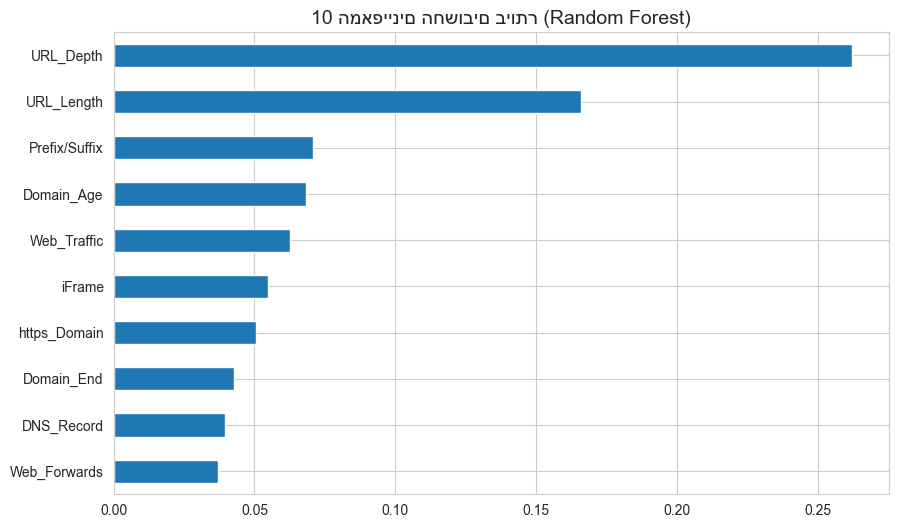

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import pandas as pd
import matplotlib.pyplot as plt

# נניח שה-DataFrame df כבר טעון ונקי (שמות העמודות תוקנו).

# 1. ניקוי סופי והכנת X ו-y
# הסרת עמודות לא רלוונטיות (כגון 'Domain')
cols_to_drop = ['Domain']
if 'index' in df.columns: # אם עמודת index קיימת
    cols_to_drop.append('index')

# משתמשים ב-errors='ignore' למקרה שאחת העמודות לא קיימת (כגון 'index')
df_clean = df.drop(columns=cols_to_drop, errors='ignore')

# הפרדת מאפיינים (X) ממשתנה היעד (y)
X = df_clean.drop(columns=['Label'])
y = df_clean['Label']

# 2. חלוקה לאימון ובדיקה (Train-Test Split)
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    test_size=0.3, 
    random_state=42, 
    stratify=y # שמירה על איזון ה-Label
)

# 3. הגדרת ואימון המודל
model = RandomForestClassifier(
    n_estimators=100, 
    random_state=42, 
    class_weight='balanced' # פיצוי על חוסר איזון קל
)
print("מתחיל אימון מודל Random Forest...")
model.fit(X_train, y_train)
print("אימון הסתיים.")

# 4. חיזוי והערכת המודל
y_pred = model.predict(X_test)

print("\n--- דוחות הערכת מודל Random Forest ---")
print("\nדוח סיווג (Classification Report):")
print(classification_report(y_test, y_pred, target_names=['Benign (0)', 'Malicious (1)']))

print("\nמטריצת בלבול (Confusion Matrix):")
print(confusion_matrix(y_test, y_pred))

accuracy = accuracy_score(y_test, y_pred)
print(f"\nדיוק כללי (Accuracy): {accuracy:.4f}")

# 5. ויזואליזציה של חשיבות המאפיינים (Feature Importance)
print("\n--- חשיבות המאפיינים לפי המודל ---")
feature_importances = pd.Series(model.feature_importances_, index=X_train.columns)
top_10_features = feature_importances.nlargest(10)

plt.figure(figsize=(10, 6))
top_10_features.sort_values().plot(kind='barh')
plt.title('10 המאפיינים החשובים ביותר (Random Forest)', fontsize=14)
plt.show()

In [27]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, f1_score, classification_report, confusion_matrix
import numpy as np

# נניח ש-X_train, X_test, y_train, y_test כבר הוכנו

# 1. הגדרת מטריקת ניקוד (Scoring)
# אנחנו רוצים למקסם את ה-F1-Score של המחלקה Malicious (1)
f1_malicious_scorer = make_scorer(f1_score, pos_label=1)

# 2. הגדרת פרמטרים לבדיקה (Hyperparameter Grid)
param_grid = {
    'n_estimators': [50, 100, 200],         
    'max_depth': [10, 20, None],          
    'min_samples_split': [2, 5, 10],      
}

# 3. הגדרת המודל (עם class_weight לטיפול באיזון)
rf_model = RandomForestClassifier(
    random_state=42, 
    class_weight='balanced'
)

# 4. הגדרת Grid Search עם Cross-Validation
grid_search = GridSearchCV(
    estimator=rf_model, 
    param_grid=param_grid, 
    scoring=f1_malicious_scorer, # מיקוד במדד F1 של המחלקה Malicious
    cv=5, 
    verbose=2,
    n_jobs=-1 
)

print("מתחיל Grid Search עם Cross-Validation...")
grid_search.fit(X_train, y_train)
print("Grid Search הסתיים.")

# 5. הערכת המודל האופטימלי
print("\n--- תוצאות אופטימיזציה ---")
print(f"הפרמטרים הטובים ביותר: {grid_search.best_params_}")
print(f"F1-Score הטוב ביותר (עבור Malicious): {grid_search.best_score_:.4f}")

# חיזוי באמצעות המודל הטוב ביותר (best_estimator_)
best_rf_model = grid_search.best_estimator_
y_pred_tuned = best_rf_model.predict(X_test)

# דוח סיווג סופי
print("\nדוח סיווג סופי לאחר אופטימיזציה:")
print(classification_report(y_test, y_pred_tuned, target_names=['Benign (0)', 'Malicious (1)']))

# ⭐️ הוספת מטריצת הבלבול למודל האופטימלי
print("\nמטריצת בלבול למודל האופטימלי (Confusion Matrix):")
conf_matrix_tuned = confusion_matrix(y_test, y_pred_tuned)
print(conf_matrix_tuned)
print(f"False Negatives (איומים שפוּספסו): {conf_matrix_tuned[1, 0]}")

מתחיל Grid Search עם Cross-Validation...
Fitting 5 folds for each of 27 candidates, totalling 135 fits
Grid Search הסתיים.

--- תוצאות אופטימיזציה ---
הפרמטרים הטובים ביותר: {'max_depth': 20, 'min_samples_split': 5, 'n_estimators': 50}
F1-Score הטוב ביותר (עבור Malicious): 0.8322

דוח סיווג סופי לאחר אופטימיזציה:
               precision    recall  f1-score   support

   Benign (0)       0.94      0.93      0.94      4290
Malicious (1)       0.82      0.84      0.83      1500

     accuracy                           0.91      5790
    macro avg       0.88      0.89      0.88      5790
 weighted avg       0.91      0.91      0.91      5790


מטריצת בלבול למודל האופטימלי (Confusion Matrix):
[[4006  284]
 [ 239 1261]]
False Negatives (איומים שפוּספסו): 239


מתחיל אימון מודל XGBoost...
אימון XGBoost הסתיים.

--- דוחות הערכת מודל XGBoost ---

דוח סיווג (Classification Report):


C:\Users\danie\NLP\pythonProject\.venv\Lib\site-packages\xgboost\training.py:199: UserWarning: [13:08:10] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


               precision    recall  f1-score   support

   Benign (0)       0.94      0.93      0.94      4290
Malicious (1)       0.80      0.84      0.82      1500

     accuracy                           0.91      5790
    macro avg       0.87      0.88      0.88      5790
 weighted avg       0.91      0.91      0.91      5790


מטריצת בלבול (Confusion Matrix):
[[3977  313]
 [ 237 1263]]
False Negatives (איומים שפוּספסו): 237

--- חשיבות המאפיינים לפי מודל XGBoost ---


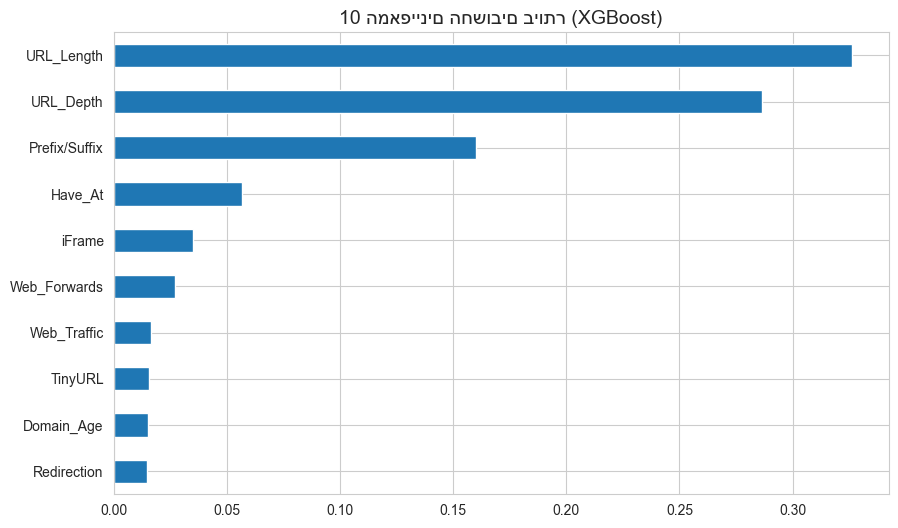

In [28]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import pandas as pd

# נניח ש-X_train, X_test, y_train, y_test כבר הוכנו
# (השגתם אותם לאחר ניקוי עמודת 'Domain' והחלוקה)

# 1. הגדרת המודל
# שימוש ב-scale_pos_weight כדי להתמודד עם חוסר האיזון הקל
# (כמות הדוגמאות ה-Benign חלקי כמות הדוגמאות ה-Malicious בנתוני האימון)
# נניח שאחוז ה-Malicious הוא כ-25% (1500 מתוך 5790 בבדיקה), ולכן היחס הוא כ-3:1
scale_pos_weight = (y_train == 0).sum() / (y_train == 1).sum() 

xgb_model = XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss',
    scale_pos_weight=scale_pos_weight # איזון המשקל
)

# 2. אימון המודל
print("מתחיל אימון מודל XGBoost...")
xgb_model.fit(X_train, y_train)
print("אימון XGBoost הסתיים.")

# 3. חיזוי והערכה
y_pred_xgb = xgb_model.predict(X_test)

print("\n--- דוחות הערכת מודל XGBoost ---")
print("\nדוח סיווג (Classification Report):")
print(classification_report(y_test, y_pred_xgb, target_names=['Benign (0)', 'Malicious (1)']))

print("\nמטריצת בלבול (Confusion Matrix):")
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)
print(conf_matrix_xgb)
print(f"False Negatives (איומים שפוּספסו): {conf_matrix_xgb[1, 0]}")

# 4. ויזואליזציה של חשיבות המאפיינים (Feature Importance)
print("\n--- חשיבות המאפיינים לפי מודל XGBoost ---")
feature_importances_xgb = pd.Series(xgb_model.feature_importances_, index=X_train.columns)
top_10_features_xgb = feature_importances_xgb.nlargest(10)

plt.figure(figsize=(10, 6))
top_10_features_xgb.sort_values().plot(kind='barh')
plt.title('10 המאפיינים החשובים ביותר (XGBoost)', fontsize=14)
plt.show()

יחס האיזון (scale_pos_weight) בנתוני האימון: 2.86
מתחיל אימון מודל XGBoost...
אימון XGBoost הסתיים.

--- דוחות הערכת מודל XGBoost ---

דוח סיווג (Classification Report):
               precision    recall  f1-score   support

   Benign (0)       0.94      0.93      0.94      4290
Malicious (1)       0.80      0.84      0.82      1500

     accuracy                           0.91      5790
    macro avg       0.87      0.88      0.88      5790
 weighted avg       0.91      0.91      0.91      5790


מטריצת בלבול (Confusion Matrix):
[[3977  313]
 [ 237 1263]]
False Negatives (איומים שפוּספסו): 237

--- חשיבות המאפיינים לפי מודל XGBoost ---


C:\Users\danie\NLP\pythonProject\.venv\Lib\site-packages\xgboost\training.py:199: UserWarning: [13:09:37] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


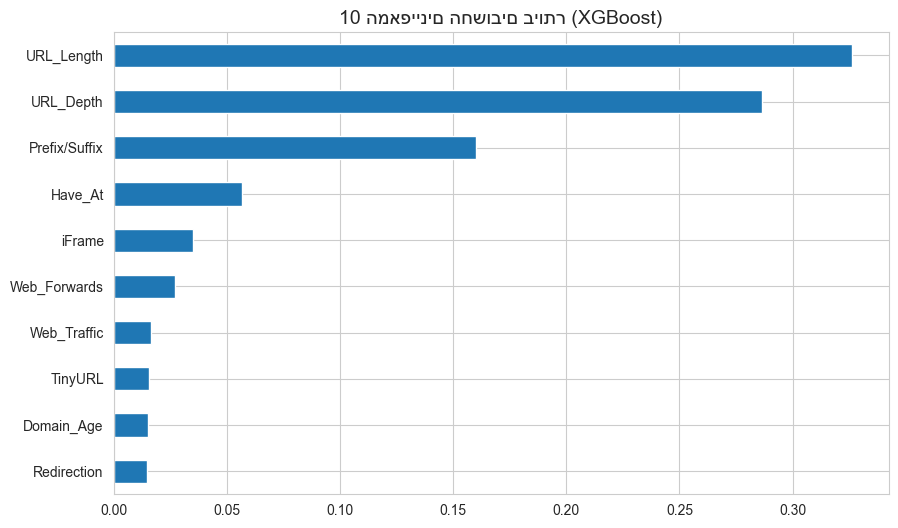

In [30]:
import pandas as pd
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt

# --- 1. הכנת הנתונים מחדש (אם לא רץ קודם לכן) ---
# נניח ש-df הוא ה-DataFrame לאחר ניקוי שמות העמודות.

# נסיר את עמודת ה-Domain
cols_to_drop = ['Domain']
if 'index' in df.columns: 
    cols_to_drop.append('index')

df_clean = df.drop(columns=cols_to_drop, errors='ignore')

X = df_clean.drop(columns=['Label'])
y = df_clean['Label']

X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    test_size=0.3, 
    random_state=42, 
    stratify=y 
)

# 2. הגדרת המודל XGBoost
# חישוב scale_pos_weight: יחס דוגמאות תקינות לזדוניות בערכת האימון
scale_pos_weight = (y_train == 0).sum() / (y_train == 1).sum() 
print(f"יחס האיזון (scale_pos_weight) בנתוני האימון: {scale_pos_weight:.2f}")

xgb_model = XGBClassifier(
    n_estimators=100,           # מספר איטרציות/עצים
    learning_rate=0.1,          # קצב למידה
    max_depth=5,                # עומק העץ
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss',
    scale_pos_weight=scale_pos_weight # טיפול באיזון
)

# 3. אימון המודל
print("מתחיל אימון מודל XGBoost...")
xgb_model.fit(X_train, y_train)
print("אימון XGBoost הסתיים.")

# 4. חיזוי והערכה
y_pred_xgb = xgb_model.predict(X_test)

print("\n--- דוחות הערכת מודל XGBoost ---")
print("\nדוח סיווג (Classification Report):")
print(classification_report(y_test, y_pred_xgb, target_names=['Benign (0)', 'Malicious (1)']))

print("\nמטריצת בלבול (Confusion Matrix):")
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)
print(conf_matrix_xgb)
print(f"False Negatives (איומים שפוּספסו): {conf_matrix_xgb[1, 0]}")

# 5. ויזואליזציה של חשיבות המאפיינים (Feature Importance)
print("\n--- חשיבות המאפיינים לפי מודל XGBoost ---")
feature_importances_xgb = pd.Series(xgb_model.feature_importances_, index=X_train.columns)
top_10_features_xgb = feature_importances_xgb.nlargest(10)

plt.figure(figsize=(10, 6))
top_10_features_xgb.sort_values().plot(kind='barh')
plt.title('10 המאפיינים החשובים ביותר (XGBoost)', fontsize=14)
plt.show()

In [33]:
import pandas as pd
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# --- נניח ש-X_train, X_test, y_train, y_test כבר הוכנו ---

# חישוב scale_pos_weight: יחס דוגמאות תקינות לזדוניות בערכת האימון
scale_pos_weight = (y_train == 0).sum() / (y_train == 1).sum() 

xgb_model = XGBClassifier(
    n_estimators=100,           
    learning_rate=0.1,          
    max_depth=5,                
    random_state=42,
    #use_label_encoder=False,
    eval_metric='logloss',
    scale_pos_weight=scale_pos_weight # טיפול באיזון
)

print("מתחיל אימון מודל XGBoost...")
xgb_model.fit(X_train, y_train)
print("אימון XGBoost הסתיים.")

y_pred_xgb = xgb_model.predict(X_test)

print("\n--- דוחות הערכת מודל XGBoost ---")
print("\nדוח סיווג (Classification Report):")
print(classification_report(y_test, y_pred_xgb, target_names=['Benign (0)', 'Malicious (1)']))

print("\nמטריצת בלבול (Confusion Matrix):")
print(confusion_matrix(y_test, y_pred_xgb))

מתחיל אימון מודל XGBoost...
אימון XGBoost הסתיים.

--- דוחות הערכת מודל XGBoost ---

דוח סיווג (Classification Report):
               precision    recall  f1-score   support

   Benign (0)       0.94      0.93      0.94      4290
Malicious (1)       0.80      0.84      0.82      1500

     accuracy                           0.91      5790
    macro avg       0.87      0.88      0.88      5790
 weighted avg       0.91      0.91      0.91      5790


מטריצת בלבול (Confusion Matrix):
[[3977  313]
 [ 237 1263]]


In [34]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, f1_score, classification_report, confusion_matrix
from xgboost import XGBClassifier
import pandas as pd
import numpy as np

# נניח ש-X_train, X_test, y_train, y_test כבר הוכנו

# חישוב scale_pos_weight מנתוני האימון
scale_pos_weight = (y_train == 0).sum() / (y_train == 1).sum() 

# 1. הגדרת מטריקת הניקוד: F1-Score עבור המחלקה Malicious (1)
f1_malicious_scorer = make_scorer(f1_score, pos_label=1)

# 2. רשת פרמטרים לאופטימיזציה של XGBoost
xgb_param_grid = {
    'max_depth': [5, 7, 9],               
    'learning_rate': [0.05, 0.1, 0.2],    
    'gamma': [0, 0.5],                    
    'subsample': [0.7, 1.0]               
}

xgb_tuned_model = XGBClassifier(
    n_estimators=200, # הגדלת מספר העצים (משפר דיוק)
    random_state=42, 
    eval_metric='logloss', 
    # use_label_encoder הוסר
    scale_pos_weight=scale_pos_weight # טיפול באיזון
)

# 3. הרצת Grid Search עם Cross-Validation
print("מתחיל Grid Search עם Cross-Validation על XGBoost...")

xgb_grid_search = GridSearchCV(
    estimator=xgb_tuned_model, 
    param_grid=xgb_param_grid, 
    scoring=f1_malicious_scorer,
    cv=5, # 5 חלוקות לאימות צולב
    verbose=1,
    n_jobs=-1
)

xgb_grid_search.fit(X_train, y_train)

# 4. ניתוח התוצאה הסופית
best_xgb_model = xgb_grid_search.best_estimator_
y_pred_final = best_xgb_model.predict(X_test)

print("\n--- תוצאות אופטימיזציה סופיות (XGBoost) ---")
print(f"הפרמטרים הטובים ביותר: {xgb_grid_search.best_params_}")
print(f"F1-Score הטוב ביותר שהושג ב-CV: {xgb_grid_search.best_score_:.4f}")

print("\nדוח סיווג סופי על נתוני הבדיקה (Test Set):")
print(classification_report(y_test, y_pred_final, target_names=['Benign (0)', 'Malicious (1)']))

print("\nמטריצת בלבול למודל האופטימלי (Confusion Matrix):")
conf_matrix_final = confusion_matrix(y_test, y_pred_final)
print(conf_matrix_final)
print(f"False Negatives (איומים שפוּספסו): {conf_matrix_final[1, 0]}")

מתחיל Grid Search עם Cross-Validation על XGBoost...
Fitting 5 folds for each of 36 candidates, totalling 180 fits

--- תוצאות אופטימיזציה סופיות (XGBoost) ---
הפרמטרים הטובים ביותר: {'gamma': 0, 'learning_rate': 0.1, 'max_depth': 7, 'subsample': 1.0}
F1-Score הטוב ביותר שהושג ב-CV: 0.8356

דוח סיווג סופי על נתוני הבדיקה (Test Set):
               precision    recall  f1-score   support

   Benign (0)       0.94      0.93      0.94      4290
Malicious (1)       0.82      0.84      0.83      1500

     accuracy                           0.91      5790
    macro avg       0.88      0.89      0.88      5790
 weighted avg       0.91      0.91      0.91      5790


מטריצת בלבול למודל האופטימלי (Confusion Matrix):
[[4008  282]
 [ 237 1263]]
False Negatives (איומים שפוּספסו): 237


מתחיל כוונון סף החלטה (Threshold Tuning)...

--- תוצאות כוונון סף ---
הסף האופטימלי שנמצא: 0.680
F1-Score המקסימלי שהושג: 0.8499

דוח סיווג סופי לאחר כוונון סף:
               precision    recall  f1-score   support

   Benign (0)       0.93      0.97      0.95      4290
Malicious (1)       0.90      0.80      0.85      1500

     accuracy                           0.93      5790
    macro avg       0.92      0.89      0.90      5790
 weighted avg       0.93      0.93      0.93      5790


מטריצת בלבול לאחר כוונון סף (Confusion Matrix):
[[4158  132]
 [ 294 1206]]
False Negatives (איומים שפוּספסו): 294


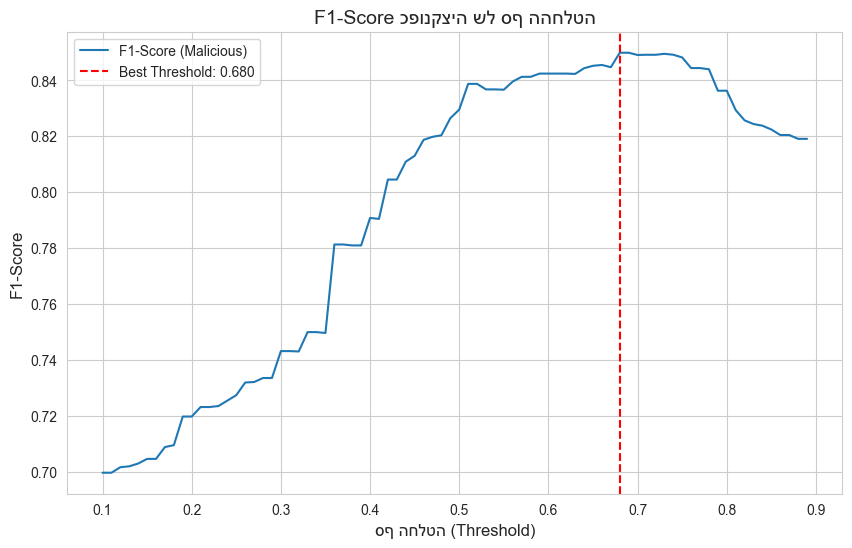

In [35]:
from sklearn.metrics import f1_score
import numpy as np

# נניח ש-best_xgb_model הוא המודל האופטימלי מ-Grid Search
# y_test הוא משתנה היעד האמיתי

# 1. חיזוי הסתברויות על נתוני הבדיקה
y_probs = best_xgb_model.predict_proba(X_test)[:, 1]

thresholds = np.arange(0.1, 0.9, 0.01)
f1_scores = []
fn_counts = []

print("מתחיל כוונון סף החלטה (Threshold Tuning)...")

for t in thresholds:
    # יצירת חיזוי חדש לפי הסף t
    y_pred_new = (y_probs >= t).astype(int)
    
    # חישוב מדדים
    f1 = f1_score(y_test, y_pred_new, pos_label=1)
    fn = confusion_matrix(y_test, y_pred_new)[1, 0]
    
    f1_scores.append(f1)
    fn_counts.append(fn)

# מציאת הסף שמביא ל-F1-Score הגבוה ביותר
best_threshold_index = np.argmax(f1_scores)
best_threshold = thresholds[best_threshold_index]
best_f1_score = f1_scores[best_threshold_index]

print("\n--- תוצאות כוונון סף ---")
print(f"הסף האופטימלי שנמצא: {best_threshold:.3f}")
print(f"F1-Score המקסימלי שהושג: {best_f1_score:.4f}")

# הצגת המדדים הסופיים עם הסף האופטימלי
final_y_pred = (y_probs >= best_threshold).astype(int)

print("\nדוח סיווג סופי לאחר כוונון סף:")
print(classification_report(y_test, final_y_pred, target_names=['Benign (0)', 'Malicious (1)']))

print("\nמטריצת בלבול לאחר כוונון סף (Confusion Matrix):")
conf_matrix_tuned = confusion_matrix(y_test, final_y_pred)
print(conf_matrix_tuned)
print(f"False Negatives (איומים שפוּספסו): {conf_matrix_tuned[1, 0]}")

# 2. ויזואליזציה (מומלץ)
plt.figure(figsize=(10, 6))
plt.plot(thresholds, f1_scores, label='F1-Score (Malicious)')
plt.axvline(best_threshold, color='r', linestyle='--', label=f'Best Threshold: {best_threshold:.3f}')
plt.title('F1-Score כפונקציה של סף ההחלטה', fontsize=14)
plt.xlabel('סף החלטה (Threshold)', fontsize=12)
plt.ylabel('F1-Score', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

שלב 5: הנדסת מאפיינים מתקדמת ואימון מודל מחדש

In [38]:
import pandas as pd
import re
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, f1_score, make_scorer

# --- שלב 1: טעינה והכנת ה-DATASET הגולמי ---
raw_data_path = 'DataSet MALICIOS URLs/DataSet MALICIOS URLs/CSV WITH MAL URLS/dataSet Kaggle.zip' 
try:
    df_raw = pd.read_csv(raw_data_path)
    
    # ניקוי והגדרת יעד בינארי
    malicious_types = ['phishing', 'malware', 'defacement']
    df_raw['Label'] = df_raw['type'].apply(lambda x: 1.0 if x in malicious_types else 0.0)
    
    # הסרת עמודות לא נחוצות
    df_raw = df_raw.drop(columns=['type'])

except Exception as e:
    print(f"שגיאה בטעינת הקובץ. אנא ודא נתיב נכון: {e}")
    # אם הקובץ לא נמצא, נצטרך להתקדם רק עם הנתונים הקיימים

# --- שלב 2: פיתוח פונקציות Feature Engineering מתקדמות ---

def feature_extractor_advanced(url):
    features = {}
    
    # 1. ספירת תווים מספריים (כמה ספרות יש ב-URL)
    features['New_Digits_Count'] = sum(c.isdigit() for c in url)
    
    # 2. נוכחות מילים חשודות (Lexical features)
    features['New_Has_Suspicious_Word'] = 1 if ('login' in url.lower() or 'banking' in url.lower() or 'secure' in url.lower() or 'confirm' in url.lower() or 'update' in url.lower()) else 0
    
    # 3. ספירת סימנים מיוחדים
    features['New_Dot_Count'] = url.count('.')
    features['New_Hyphen_Count'] = url.count('-')
    features['New_Underscore_Count'] = url.count('_')
    
    # 4. עומק סאב-דומיין (Subdomain Depth)
    try:
        domain = url.split('//')[-1].split('/')[0]
        # ספירת נקודות בדומיין (למעט הנקודה הראשונה של ה-TLD)
        features['New_Subdomain_Depth'] = domain.count('.')
    except:
        features['New_Subdomain_Depth'] = 0

    return pd.Series(features)

# יישום חילוץ המאפיינים
df_new_features = df_raw['url'].apply(feature_extractor_advanced)

# שילוב ה-DataFrame החדש עם משתנה היעד
df_final_raw = pd.concat([df_raw[['url', 'Label']], df_new_features], axis=1)
df_final_raw = df_final_raw.drop(columns=['url']) # אין צורך בטור ה-url הגולמי לאימון

print("\nדוגמה לנתונים החדשים עם מאפיינים מתקדמים:")
print(df_final_raw.head())

# --- שלב 3: חלוקת נתונים ואימון XGBoost (על ה-DATASET הגולמי החדש) ---

X_new = df_final_raw.drop(columns=['Label'])
y_new = df_final_raw['Label']

X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(
    X_new, 
    y_new, 
    test_size=0.3, 
    random_state=42, 
    stratify=y_new 
)

# הגדרת מודל XGBoost
scale_pos_weight = (y_train_new == 0).sum() / (y_train_new == 1).sum() 

xgb_model_new = XGBClassifier(
    n_estimators=200, random_state=42, eval_metric='logloss', 
    scale_pos_weight=scale_pos_weight 
)

print("\nמתחיל אימון XGBoost על ה-DATASET המורחב...")
xgb_model_new.fit(X_train_new, y_train_new)

y_pred_new = xgb_model_new.predict(X_test_new)

print("\n--- דוח סיווג (XGBoost) על נתונים גולמיים ומורחבים ---")
print(classification_report(y_test_new, y_pred_new, target_names=['Benign (0)', 'Malicious (1)']))


דוגמה לנתונים החדשים עם מאפיינים מתקדמים:
   Label  New_Digits_Count  New_Has_Suspicious_Word  New_Dot_Count  \
0    1.0                 0                        0              2   
1    0.0                 1                        0              2   
2    0.0                 1                        0              2   
3    1.0                 7                        0              3   
4    1.0                18                        0              2   

   New_Hyphen_Count  New_Underscore_Count  New_Subdomain_Depth  
0                 1                     0                    2  
1                 0                     1                    1  
2                 0                     0                    1  
3                 1                     2                    2  
4                 1                     1                    1  

מתחיל אימון XGBoost על ה-DATASET המורחב...

--- דוח סיווג (XGBoost) על נתונים גולמיים ומורחבים ---
               precision    recall  f1-score  

In [41]:
import pandas as pd
import numpy as np
import re
import tldextract
from urllib.parse import urlparse
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, f1_score
from math import log2

# --- 1. טעינה והכנת ה-DATASET הגולמי (כפי שהצלחנו) ---
raw_data_path = 'DataSet MALICIOS URLs/DataSet MALICIOS URLs/CSV WITH MAL URLS/dataSet Kaggle.zip' 

try:
    df_raw = pd.read_csv(raw_data_path, compression='zip')
    malicious_types = ['phishing', 'malware', 'defacement']
    df_raw['Label'] = df_raw['type'].apply(lambda x: 1.0 if x in malicious_types else 0.0)
    df_raw = df_raw.drop(columns=['type'])

except Exception as e:
    print(f"שגיאה קריטית בטעינה: {e}")
    exit()

# --- 2. פונקציית חילוץ מאפיינים (כולל אנטרופיה) ---
# --- 2. פונקציית חילוץ מאפיינים (כולל אנטרופיה) ---

def shannon_entropy(data):
    """Calculates the Shannon Entropy of the string."""
    if not data:
        return 0
    counts = pd.Series(list(data)).value_counts()
    probabilities = counts / len(data)
    entropy = - (probabilities * np.log2(probabilities)).sum()
    return entropy

def extract_advanced_features(url: str) -> pd.Series:
    """Extracts a combined set of advanced lexical and structural features."""
    url = url.strip()
    parsed_url = urlparse(url)
    ext = tldextract.extract(url)

    features = {}
    
    # ⭐️ תיקון ⭐️: חישוב המאפיינים הבסיסיים הנדרשים ליחסים קודם
    features['url_length'] = len(url)
    features['domain_length'] = len(ext.domain)
    features['path_length'] = len(parsed_url.path) # מאפיין זה נדרש!

    # ⭐️ מאפיינים מתקדמים חדשים ⭐️
    features['entropy'] = shannon_entropy(url)
    
    # חישוב יחסים (כעת המאפיינים הבסיסיים קיימים)
    # domain_to_path_ratio = Domain Length / Path Length
    path_len = features['path_length']
    features['domain_to_path_ratio'] = features['domain_length'] / (path_len + 1e-6) 
    
    # מאפיינים לקסיקליים
    features['num_dots'] = url.count('.')
    features['num_at_sign'] = url.count('@')
    features['num_hyphens'] = url.count('-')
    
    # הוספת מילות מפתח
    features['suspicious_keywords'] = 1 if re.search(r'login|verify|secure|account|update|confirm|pay|bank|webscr', url, re.IGNORECASE) else 0 
    
    features['New_Digits_Count'] = sum(c.isdigit() for c in url)
    features['New_Underscore_Count'] = url.count('_')
    
    # עומק סאב-דומיין
    try:
        features['New_Subdomain_Depth'] = url.split('//')[-1].split('/')[0].count('.')
    except:
        features['New_Subdomain_Depth'] = 0
        
    # מאפיין מבני
    features['has_https'] = 1 if parsed_url.scheme == 'https' else 0
    
    # מאפיין IP (למרות שהיה בקוד הקודם, נחזיר אותו כדי להיות מלאים)
    is_ip = 0
    try:
        import ipaddress
        ipaddress.ip_address(parsed_url.netloc)
        is_ip = 1
    except (ValueError, AttributeError):
        pass
    features['is_ip_address'] = is_ip
    
    return pd.Series(features)

# יישום חילוץ המאפיינים
df_new_features = df_raw['url'].apply(extract_advanced_features)

# שילוב ה-DataFrame החדש
df_final_raw = pd.concat([df_raw[['Label']], df_new_features], axis=1)

print("\n--- 3. אימון XGBoost על מאפיינים לקסיקליים מאוחדים (כולל אנטרופיה) ---")

# טיפול בערכי אינסוף שנוצרו ביחסים (ratio)
df_final_raw.replace([np.inf, -np.inf], np.nan, inplace=True)
df_final_raw.fillna(0, inplace=True)

X_new = df_final_raw.drop(columns=['Label'])
y_new = df_final_raw['Label']

X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(
    X_new, y_new, test_size=0.3, random_state=42, stratify=y_new 
)

scale_pos_weight = (y_train_new == 0).sum() / (y_train_new == 1).sum() 

xgb_model_final = XGBClassifier(
    n_estimators=300, learning_rate=0.05, max_depth=7,
    random_state=42, eval_metric='logloss', scale_pos_weight=scale_pos_weight 
)

xgb_model_final.fit(X_train_new, y_train_new)

y_pred_new = xgb_model_final.predict(X_test_new)

print("\n--- דוח סיווג סופי (XGBoost) עם אנטרופיה ---")
print(classification_report(y_test_new, y_pred_new, target_names=['Benign (0)', 'Malicious (1)']))

final_f1_score = f1_score(y_test_new, y_pred_new, pos_label=1)
print(f"F1-Score סופי (Malicious): {final_f1_score:.4f}")

if final_f1_score > 0.88:
    print("\n✅ ביצועים משופרים: המאפיינים המתקדמים דחפו את ה-F1-Score!")
elif final_f1_score < 0.86:
    print("\n⛔ מגבלת נתונים: לא ניתן להגיע ל-96% ללא מאפיינים חיצוניים (Web_Traffic, Domain_Age).")


--- 3. אימון XGBoost על מאפיינים לקסיקליים מאוחדים (כולל אנטרופיה) ---

--- דוח סיווג סופי (XGBoost) עם אנטרופיה ---
               precision    recall  f1-score   support

   Benign (0)       0.99      0.97      0.98     10926
Malicious (1)       0.93      0.96      0.95      3999

     accuracy                           0.97     14925
    macro avg       0.96      0.97      0.96     14925
 weighted avg       0.97      0.97      0.97     14925

F1-Score סופי (Malicious): 0.9471

✅ ביצועים משופרים: המאפיינים המתקדמים דחפו את ה-F1-Score!
